# Kaggle Dataset: Sleep Health and Lifestyle Dataset Analyze

## 1.0 Import Python Libraries

In [1]:
# Import libraries for the data science analysis
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme(style='whitegrid')
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go
import plotly.figure_factory as ff

# Import libraries for machine learning
import tensorflow as tf
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
print("Number GPUs Available:", len(tf.config.experimental.list_physical_devices('GPU')))

Number GPUs Available: 0


In [4]:
tf.test.is_built_with_cuda()

False

## 2.0 Loading Data Set

In [5]:
# Load the data set
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv", header=0)

In [6]:
# Drop "Person ID" since it is not important for the study
df = df.drop("Person ID", axis=1) 

In [7]:
# Check the column names
column_names = df.columns
column_names

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category',
       'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder'],
      dtype='object')

**Gender:** The gender of the person (Male/Female).

**Age:** The age of the person in years.

**Occupation:** The occupation or profession of the person.

**Sleep Duration (hours):** The number of hours the person sleeps per day.

**Quality of Sleep (scale: 1-10):** A subjective rating of the quality of sleep, ranging from 1 to 10.

**Physical Activity Level (minutes/day):** The number of minutes the person engages in physical activity daily.

**Stress Level (scale: 1-10):** A subjective rating of the stress level experienced by the person, ranging from 1 to 10.

**BMI Category:** The BMI category of the person (e.g., Underweight, Normal, Overweight).

**Blood Pressure (systolic/diastolic):** The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.

**Heart Rate (bpm):** The resting heart rate of the person in beats per minute.

**Daily Steps:** The number of steps the person takes per day.

**Sleep Disorder:** The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).

In [8]:
# Check the top 5 data
df.head(5)

Gender  Age            Occupation  Sleep Duration  Quality of Sleep  \
0   Male   27     Software Engineer             6.1                 6   
1   Male   28                Doctor             6.2                 6   
2   Male   28                Doctor             6.2                 6   
3   Male   28  Sales Representative             5.9                 4   
4   Male   28  Sales Representative             5.9                 4   

   Physical Activity Level  Stress Level BMI Category Blood Pressure  \
0                       42             6   Overweight         126/83   
1                       60             8       Normal         125/80   
2                       60             8       Normal         125/80   
3                       30             8        Obese         140/90   
4                       30             8        Obese         140/90   

   Heart Rate  Daily Steps Sleep Disorder  
0          77         4200            NaN  
1          75        10000            NaN  
2          75        10000            NaN  
3          85         3000    Sleep Apnea  
4          85         3000    Sleep Apnea

In [9]:
# Check the shape of the dataset
print("Dataset Shape:", df.shape)

Dataset Shape: (374, 12)


In [10]:
# Check the data frame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 35.2+ KB


* There are 5 columns are strings **(Gender; Occupation; BMI Category; Blood Pressure, Sleep Disorder)**, these columns are most probably to be a string and categorical data.
* The rest are the numerical datatypes. 
* There are not no null values.

In [11]:
# Observe the description of the data in DataFrame
print("\nSummary Statistics:")
df.describe()


Summary Statistics:


Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
count  374.000000      374.000000        374.000000               374.000000   
mean    42.184492        7.132086          7.312834                59.171123   
std      8.673133        0.795657          1.196956                20.830804   
min     27.000000        5.800000          4.000000                30.000000   
25%     35.250000        6.400000          6.000000                45.000000   
50%     43.000000        7.200000          7.000000                60.000000   
75%     50.000000        7.800000          8.000000                75.000000   
max     59.000000        8.500000          9.000000                90.000000   

       Stress Level  Heart Rate   Daily Steps  
count    374.000000  374.000000    374.000000  
mean       5.385027   70.165775   6816.844920  
std        1.774526    4.135676   1617.915679  
min        3.000000   65.000000   3000.000000  
25%        4.000000   68.000000   5600.000000  
50%        5.000000   70.000000   7000.000000  
75%        7.000000   72.000000   8000.000000  
max        8.000000   86.000000  10000.000000

In [12]:
# Check for any zero values existing in the dataframe
for column_name in df.columns:
    has_zero_value = (df[column_name] == 0).any()
    
    if has_zero_value:
        print(f"The column '{column_name}' contains at least one value equal to 0.")
    else:
        print(f"The column '{column_name}' does not contain any value equal to 0.")

The column 'Gender' does not contain any value equal to 0.
The column 'Age' does not contain any value equal to 0.
The column 'Occupation' does not contain any value equal to 0.
The column 'Sleep Duration' does not contain any value equal to 0.
The column 'Quality of Sleep' does not contain any value equal to 0.
The column 'Physical Activity Level' does not contain any value equal to 0.
The column 'Stress Level' does not contain any value equal to 0.
The column 'BMI Category' does not contain any value equal to 0.
The column 'Blood Pressure' does not contain any value equal to 0.
The column 'Heart Rate' does not contain any value equal to 0.
The column 'Daily Steps' does not contain any value equal to 0.
The column 'Sleep Disorder' does not contain any value equal to 0.


In [13]:
# Checking for any missing value in the dataset
df.isnull().sum()

Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

- In the "Sleeping Disorder" column there are **219 of NaN values** which are important for the study. This missing values will be replaced by **"None"** as the indicator of **no sleeping disorder**.

In [14]:
# For missing values are fill with "None"
df["Sleep Disorder"].fillna("None", inplace=True)

In [15]:
# Check the labels for "Sleeping Disorder" column
df["Sleep Disorder"].unique()

array(['None', 'Sleep Apnea', 'Insomnia'], dtype=object)

In [16]:
# Quick check on the correlations of the data set
corr = df.corr(numeric_only=True)
corr

Age  Sleep Duration  Quality of Sleep  \
Age                      1.000000        0.344709          0.473734   
Sleep Duration           0.344709        1.000000          0.883213   
Quality of Sleep         0.473734        0.883213          1.000000   
Physical Activity Level  0.178993        0.212360          0.192896   
Stress Level            -0.422344       -0.811023         -0.898752   
Heart Rate              -0.225606       -0.516455         -0.659865   
Daily Steps              0.057973       -0.039533          0.016791   

                         Physical Activity Level  Stress Level  Heart Rate  \
Age                                     0.178993     -0.422344   -0.225606   
Sleep Duration                          0.212360     -0.811023   -0.516455   
Quality of Sleep                        0.192896     -0.898752   -0.659865   
Physical Activity Level                 1.000000     -0.034134    0.136971   
Stress Level                           -0.034134      1.000000    0.670026   
Heart Rate                              0.136971      0.670026    1.000000   
Daily Steps                             0.772723      0.186829   -0.030309   

                         Daily Steps  
Age                         0.057973  
Sleep Duration             -0.039533  
Quality of Sleep            0.016791  
Physical Activity Level     0.772723  
Stress Level                0.186829  
Heart Rate                 -0.030309  
Daily Steps                 1.000000

**Observations:**
- Two biggest factors for Quality of Sleep are Sleep Duration (Positive Correlation) and Stress Level (Negative Correlation).
- Physical Activity Level and Daily Steps both have positive correlations. 

The data is ready for the Exploratory Data Analysis (EDA)

## 3.0 Exploratory Data Analysis (EDA)

In [17]:
# Features for the analysis
column_names

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category',
       'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder'],
      dtype='object')

* There are 5 columns are strings **(Gender; Occupation; BMI Category; Blood Pressure, Sleep Disorder)**, these columns are most probably to be a string and categorical data.
* The rest are numerical data.

In [18]:
# Check all the unique values for the object columns
def print_unique_col_values(df):
  for column in df:
    if df[column].dtypes=="object": # to print object items only
        print(f"{column} : {df[column].unique()}")

In [19]:
print_unique_col_values(df)

Gender : ['Male' 'Female']
Occupation : ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']
BMI Category : ['Overweight' 'Normal' 'Obese' 'Normal Weight']
Blood Pressure : ['126/83' '125/80' '140/90' '120/80' '132/87' '130/86' '117/76' '118/76'
 '128/85' '131/86' '128/84' '115/75' '135/88' '129/84' '130/85' '115/78'
 '119/77' '121/79' '125/82' '135/90' '122/80' '142/92' '140/95' '139/91'
 '118/75']
Sleep Disorder : ['None' 'Sleep Apnea' 'Insomnia']


**Let us account the string labels first**

C:\Users\cjx14\anaconda3\envs\tensor\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1500x1000 with 0 Axes>

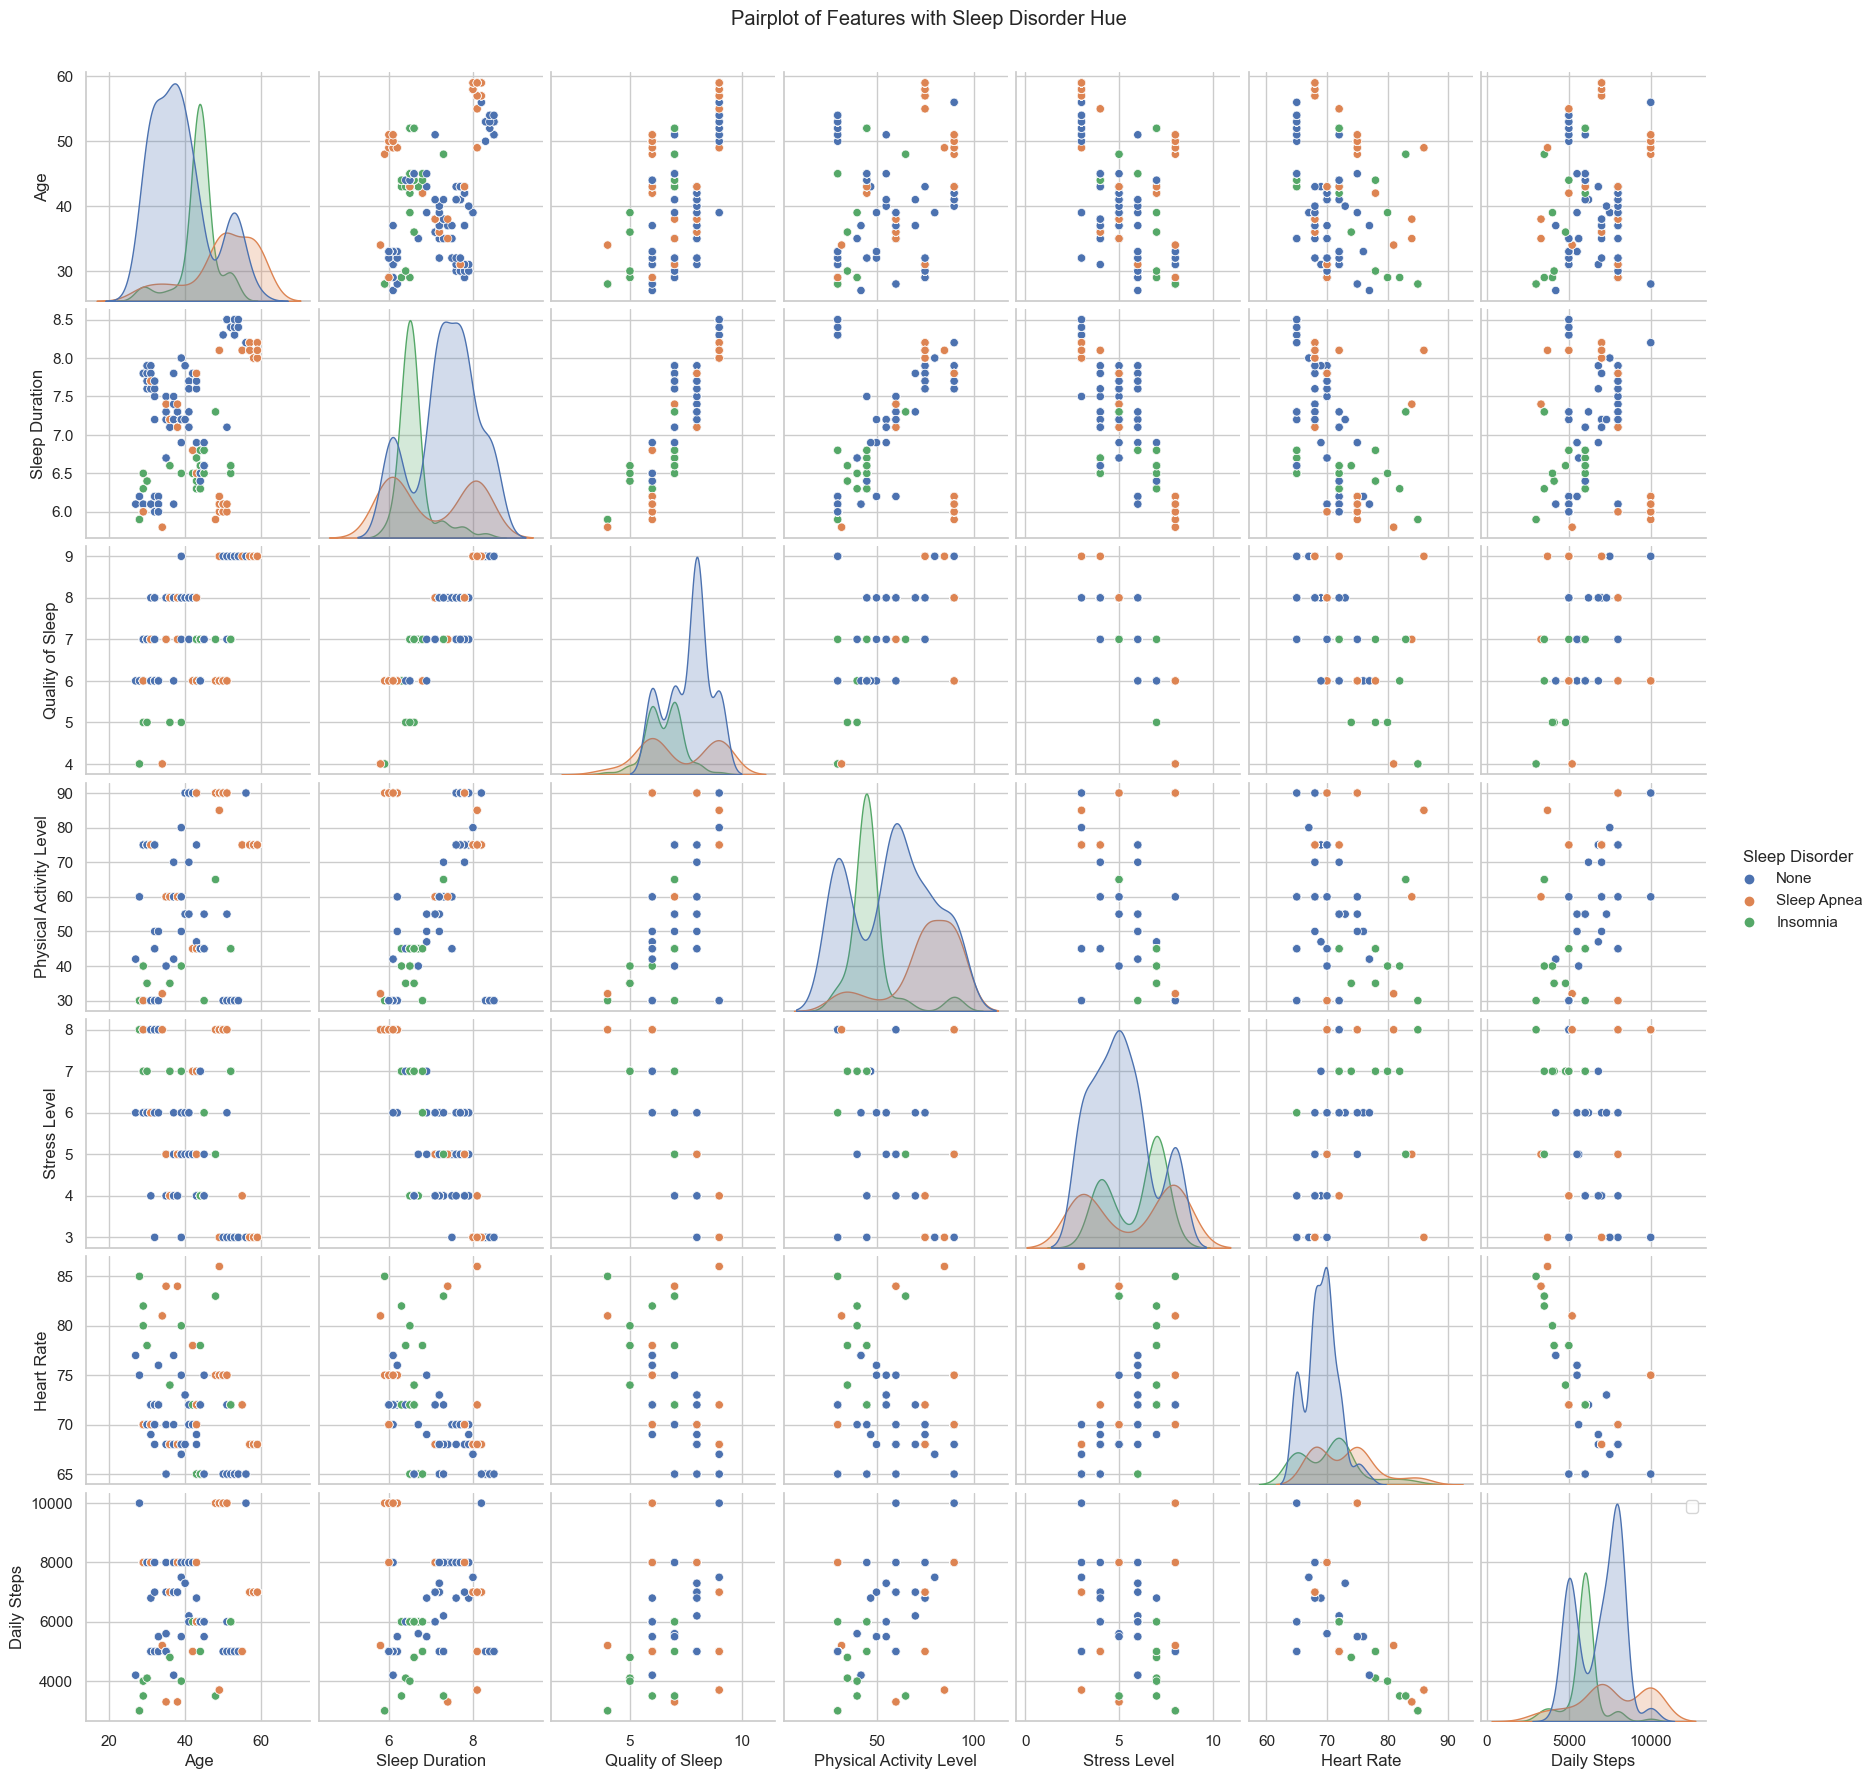

In [20]:
# Visualize data distributions and relationships
plt.figure(figsize=(15, 10))
sns.pairplot(data=df, hue='Sleep Disorder', diag_kind='kde')
plt.suptitle('Pairplot of Features with Sleep Disorder Hue', y=1.02)
plt.legend()
plt.show()

**Target Label: Sleep Disorder**

In [21]:
# Check the sleep disorder labels
sleep_class = df["Sleep Disorder"].unique()
print(f"The classification for sleep disorder are: {sleep_class}")

The classification for sleep disorder are: ['None' 'Sleep Apnea' 'Insomnia']


In [22]:
# Check the quatity of labels in "Sleep Disorder" column
disorder_counts = df['Sleep Disorder'].value_counts()
disorder_counts

Sleep Disorder
None           219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

**Observation**: 
- It is clear that the proportion of people without sleeping disorder possessed larger volume compared to others.
- There is label imbalance.

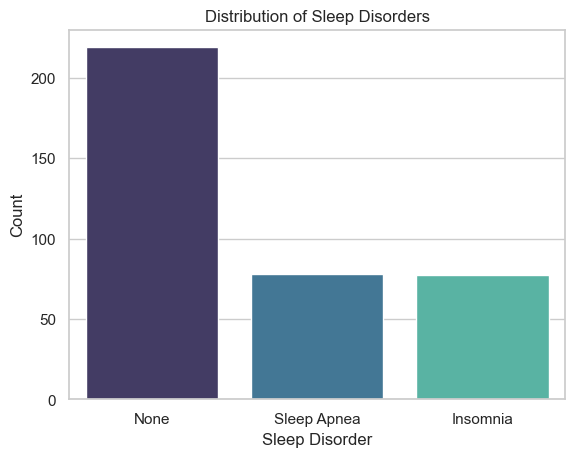

In [23]:
# Visualize the Distribution of Sleep Disorders
sns.barplot(x=disorder_counts.index, y=disorder_counts, palette="mako")
plt.xlabel('Sleep Disorder')
plt.ylabel('Count')
plt.title('Distribution of Sleep Disorders')
plt.show()

**Gender**

In [24]:
# Check the "Gender" labels
gender = df["Gender"].unique()
print(f"The classification for gender are: {gender}")

The classification for gender are: ['Male' 'Female']


In [25]:
# Check the number of "Gender" labels
gender_count = df["Gender"].value_counts()
gender_count

Gender
Male      189
Female    185
Name: count, dtype: int64

In [26]:
# Check the sleep disorder count based on gender
disorder_by_gender = df.groupby(["Gender", "Sleep Disorder"]).size().reset_index(name='Count')
disorder_by_gender

Gender Sleep Disorder  Count
0  Female       Insomnia     36
1  Female           None     82
2  Female    Sleep Apnea     67
3    Male       Insomnia     41
4    Male           None    137
5    Male    Sleep Apnea     11

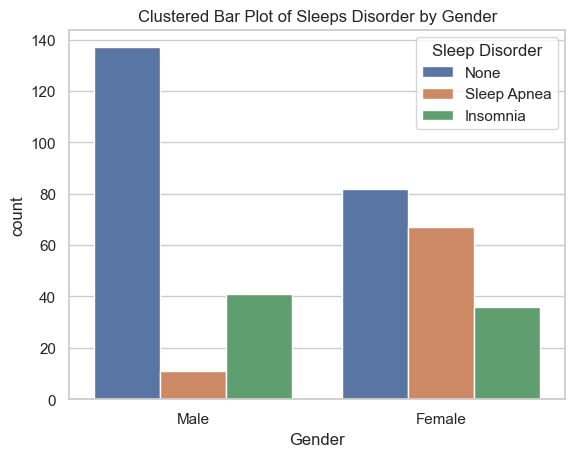

In [27]:
# Visualize a Clustered Countplot using Seaborn
sns.countplot(x='Gender', hue='Sleep Disorder', data=df)
plt.title('Clustered Bar Plot of Sleeps Disorder by Gender')
plt.show()

In [28]:
# Visualize Sleep Disorder Counts by Gender using a Bar Plot
fig = px.bar(disorder_by_gender, x='Gender', y='Count', 
             color='Sleep Disorder',
             title='Bar Plot of Sleep Disorders by Gender',
             labels={'Count': 'Sleep Disorder Count'},
             barmode='group') 
fig.show()

**OBSERVATION**
- **Without Sleeping Disorder:** The number of males (137) is higher than females (82).
- **Insomnia:** Males (41) slightly outnumber females (36).
- **Sleep Apnea:** Females (67) have a higher prevalence compared to males (11).

**Occupation**

In [29]:
# Check the unique "Occupation" labels
job = df["Occupation"].unique()
print(f"The classification for occupation are: {job}")

The classification for occupation are: ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']


In [30]:
# Check the number of unique occupation labels and their counts
job_count = df["Occupation"].value_counts()
job_count

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

In [31]:
# Group the data by "Occupation" and "Sleep Disorder" to check counts
disorder_by_job = df.groupby(["Occupation", "Sleep Disorder"]).size().reset_index(name='Count')
disorder_by_job

Occupation Sleep Disorder  Count
0             Accountant       Insomnia      7
1             Accountant           None     30
2                 Doctor       Insomnia      3
3                 Doctor           None     64
4                 Doctor    Sleep Apnea      4
5               Engineer       Insomnia      5
6               Engineer           None     57
7               Engineer    Sleep Apnea      1
8                 Lawyer       Insomnia      2
9                 Lawyer           None     42
10                Lawyer    Sleep Apnea      3
11               Manager           None      1
12                 Nurse       Insomnia      3
13                 Nurse           None      9
14                 Nurse    Sleep Apnea     61
15  Sales Representative    Sleep Apnea      2
16           Salesperson       Insomnia     29
17           Salesperson           None      2
18           Salesperson    Sleep Apnea      1
19             Scientist           None      2
20             Scientist    Sleep Apnea      2
21     Software Engineer       Insomnia      1
22     Software Engineer           None      3
23               Teacher       Insomnia     27
24               Teacher           None      9
25               Teacher    Sleep Apnea      4

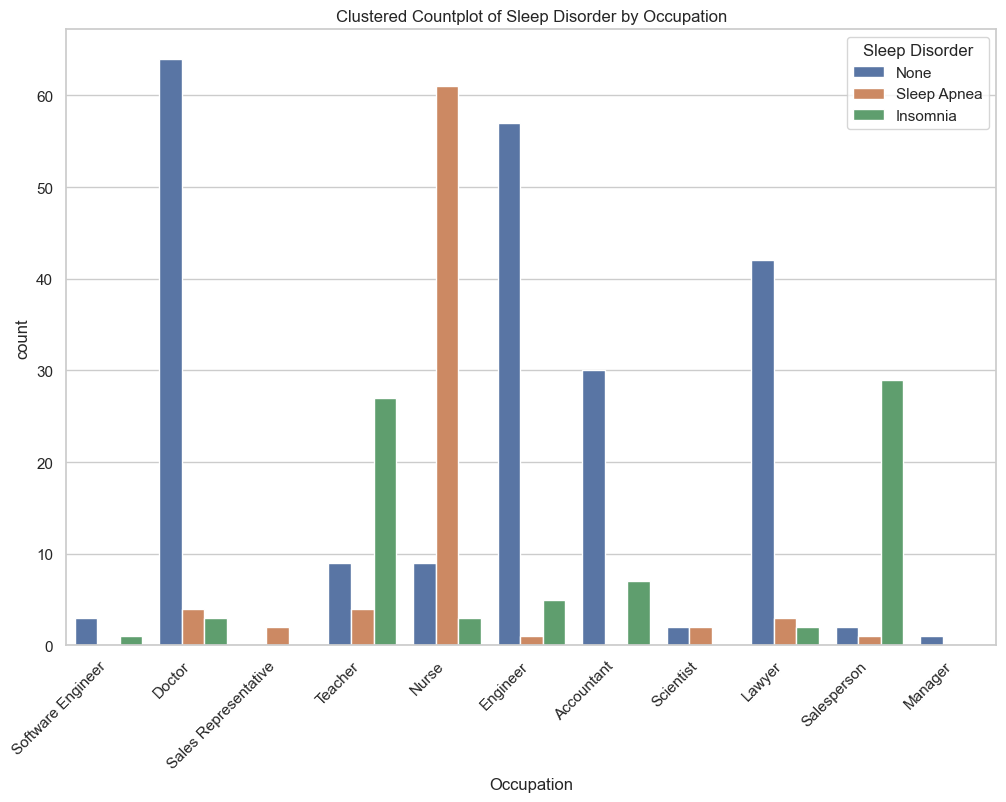

In [32]:
# Visualize Sleep Disorder Counts by Occupation using a Clustered Countplot
plt.figure(figsize=(12, 8))
sns.countplot(x='Occupation', hue='Sleep Disorder', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Clustered Countplot of Sleep Disorder by Occupation')
plt.show()

C:\Users\cjx14\anaconda3\envs\tensor\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 1500x1000 with 0 Axes>

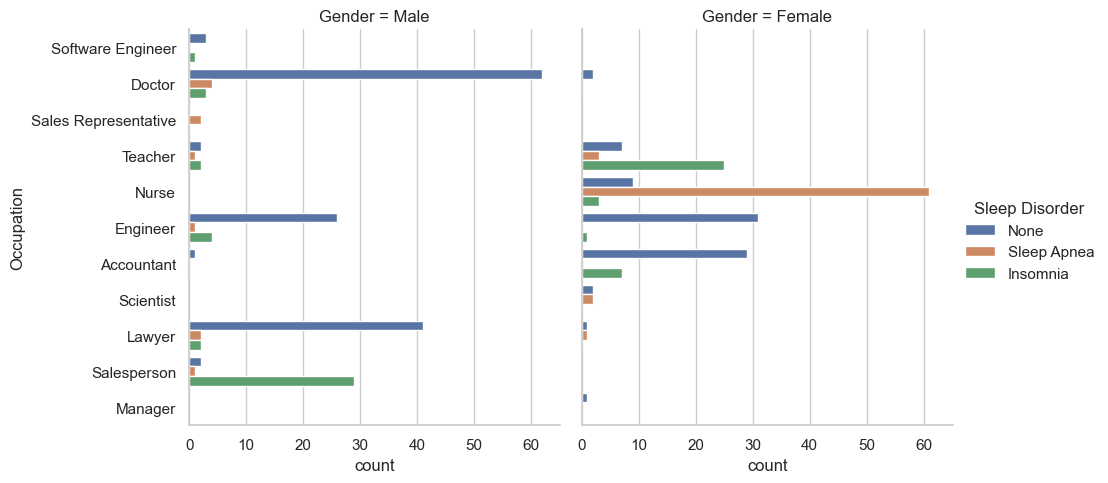

In [33]:
# Visualize Sleep Disorder Counts by Occupation and Gender using a Clustered Countplot
plt.figure(figsize=(15,10))
sns.catplot(y="Occupation", hue="Sleep Disorder",col= "Gender", kind="count", data=df)
plt.show()

In [34]:
# Visualize Sleep Disorder Distribution by Occupation using a Sunburst Chart
fig = px.sunburst(disorder_by_job, path=[px.Constant("Sleep Disorder"), "Sleep Disorder", "Occupation"],  
                  values="Count", 
                  title="Sunburst Chart of Sleep Disorders by Occupation",
                  labels={"Count": "Sleep Disorder Count"},
                  color_discrete_sequence=px.colors.sequential.Agsunset)
fig.show()

**Observation**
- **None:** Among the occupations, doctors (64) have a higher incidence compared to others.
- **Insomnia:** Salespersons (29) and teachers (27) experience higher rates of insomnia than other professions.
- **Sleep Apnea:** Nurses (61) show the highest prevalence.

**Sleep Duration & Quality of Sleep**

In [35]:
# Check the unique values in the "Sleep Duration" column
sleep_durations = df["Sleep Duration"].unique()
sleep_durations.sort()
print(f"The unique values for sleep duration are: {sleep_durations}")

The unique values for sleep duration are: [5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.1 7.2 7.3 7.4 7.5 7.6
 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5]


In [36]:
# Check the unique values in the "Quality of Sleep" column
sleep_qualities = df["Quality of Sleep"].unique()
sleep_qualities.sort()
print(f"The unique values for quality of sleep are: {sleep_qualities}")

The unique values for quality of sleep are: [4 5 6 7 8 9]


In [37]:
# Check the sleep disorder count based on Sleep Duration, Quality of Sleep, and Sleep Disorder
disorder_by_sleep = df.groupby(["Sleep Duration", "Quality of Sleep", "Sleep Disorder"]).size().reset_index(name='Count')
disorder_by_sleep

Sleep Duration  Quality of Sleep Sleep Disorder  Count
0              5.8                 4    Sleep Apnea      2
1              5.9                 4       Insomnia      1
2              5.9                 4    Sleep Apnea      2
3              5.9                 6    Sleep Apnea      1
4              6.0                 6       Insomnia      1
..             ...               ...            ...    ...
61             8.2                 9    Sleep Apnea      9
62             8.3                 9       Insomnia      1
63             8.3                 9           None      4
64             8.4                 9           None     14
65             8.5                 9           None     13

[66 rows x 4 columns]

In [38]:
# Visualize a Treemap of Sleep Disorders based on Quality of Sleep and Sleep Duration
fig = px.treemap(disorder_by_sleep, 
                 path=[px.Constant("Sleep Disorder"), "Sleep Disorder", "Quality of Sleep"],
                 values="Count", color="Sleep Duration", 
                 color_continuous_scale=px.colors.sequential.Viridis,
                 title="Treemap of Sleep Disorders by Quality of Sleep and Sleep Duration",
                 labels={"Count": "Frequency", "Sleep Duration": "Sleep Duration"})
fig.show()

**Age**

In [39]:
# Check the unique values in the "Age" column
ages = df["Age"].unique()
ages.sort()
print(f"The unique values for age are: {ages}")

The unique values for age are: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 48 49 50 51 52
 53 54 55 56 57 58 59]


In [40]:
# Visualize a Horizontal Box Plot of Age grouped by Sleep Disorder
fig = px.box(df, x="Age", y="Sleep Disorder", orientation="h", color='Sleep Disorder',
             title="Horizontal Box Plot of Age Grouped by Sleep Disorder",
             labels={"Age": "Age", "Sleep Disorder": "Sleep Disorder"},
             color_discrete_sequence=px.colors.qualitative.Set2)

fig.show()

**Stress Level**

In [41]:
# Check the unique values in the "Stress Level" column
stress_levels = df["Stress Level"].unique()
stress_levels.sort()
print(f"The unique values for stress levels are: {stress_levels}")

The unique values for stress levels are: [3 4 5 6 7 8]


In [42]:
# Check the sleep disorder count based on Stress Level
disorder_by_stress = df.groupby(["Stress Level", "Sleep Disorder"]).size().reset_index(name='Count')
disorder_by_stress

Stress Level Sleep Disorder  Count
0              3       Insomnia      1
1              3           None     40
2              3    Sleep Apnea     30
3              4       Insomnia     24
4              4           None     43
5              4    Sleep Apnea      3
6              5       Insomnia      6
7              5           None     57
8              5    Sleep Apnea      4
9              6       Insomnia      2
10             6           None     43
11             6    Sleep Apnea      1
12             7       Insomnia     41
13             7           None      3
14             7    Sleep Apnea      6
15             8       Insomnia      3
16             8           None     33
17             8    Sleep Apnea     34

In [43]:
# Visualize a Bar Plot of Sleep Disorders based on Stress Level
fig = px.bar(disorder_by_stress, x="Stress Level", y="Count", 
             color="Sleep Disorder", 
             title="Bar Plot of Sleep Disorders by Stress Level",
             labels={"Count": "Sleep Disorder Count"},
             barmode="group") 
fig.show()

**Health Condition: BMI Category, Blood Pressure, Heart Rate**

In [44]:
# Visualize a 3D Scatter Plot of Sleep Disorders by Health Condition
fig = px.scatter_3d(df, x='BMI Category', y='Blood Pressure', z='Heart Rate',
                    color='Sleep Disorder', opacity=0.7,  
                    title='3D Scatter Plot of Sleep Disorders by Health Condition',
                    labels={'BMI Category': 'BMI Category', 'Blood Pressure': 'Blood Pressure', 'Heart Rate': 'Heart Rate'},
                    color_discrete_sequence=px.colors.qualitative.Safe)

fig.update_layout(scene=dict(xaxis_title='BMI Category',
                             yaxis_title='Blood Pressure',
                             zaxis_title='Heart Rate'))

fig.show()

In [45]:
# Visualize a Bar Plot of Sleep Disorders based on BMI Category
disorder_by_bmi = df.groupby(["BMI Category", "Sleep Disorder"]).size().reset_index(name='Count')
fig = px.bar(disorder_by_bmi, x="BMI Category", y="Count", 
             color="Sleep Disorder",
             title="Bar Plot of Sleep Disorders by BMI Category",
             labels={"Count": "Sleep Disorder Count"},
             barmode="group") 
fig.show()

**OBSERVATION**
- Overweight people suffers insomia or sleep apnea as compared to other BMI categories.
- The "Normal Weight" data can be combined with "Normal" data later during pre-processing part.

**Physical Activity Level & Daily Steps**

In [46]:
# Check the relationship between Physical Activity Level and Daily Steps
physical_steps = df.groupby(["Physical Activity Level", "Daily Steps"]).size().reset_index(name='Count')
physical_steps

Physical Activity Level  Daily Steps  Count
0                        30         3000      3
1                        30         5000     57
2                        30         6000      2
3                        30         8000      6
4                        32         5200      2
5                        35         4100      2
6                        35         4800      2
7                        40         3500      1
8                        40         4000      3
9                        40         5600      2
10                       42         4200      2
11                       45         5000      3
12                       45         6000     63
13                       45         8000      2
14                       47         6800      1
15                       50         5500      3
16                       50         7000      1
17                       55         5500      1
18                       55         6000      3
19                       55         7300      2
20                       60         3300      2
21                       60         5000      6
22                       60         7000     32
23                       60         8000     28
24                       60        10000      2
25                       65         3500      2
26                       70         6200      1
27                       70         7000      2
28                       75         5000      2
29                       75         6800      2
30                       75         7000     31
31                       75         8000     32
32                       80         7500      2
33                       85         3700      2
34                       90         8000     33
35                       90        10000     34

In [47]:
# Visualize the relationship between Daily Steps and Physical Activity Level
fig = px.scatter(df, x="Daily Steps", y="Physical Activity Level", color="Sleep Disorder", 
                 title="Scatter Plot of Physical Activity Level vs Daily Steps",
                 labels={"Daily Steps": "Daily Steps", "Physical Activity Level": "Physical Activity Level"},
                 category_orders={"Physical Activity Level": ["Low", "Moderate", "High"]})
fig.show()

In [48]:
# Visualize Facet Plot of Physical Activity Level vs Daily Steps by Gender and Sleep Disorder
fig = px.scatter(df, x="Daily Steps", y="Physical Activity Level", color="Sleep Disorder",
                 facet_col="Gender",
                 title="Facet Plot of Physical Activity Level vs Daily Steps by Gender and Sleep Disorder",
                 labels={"Daily Steps": "Daily Steps", "Physical Activity Level": "Physical Activity Level"})
fig.show()

In [49]:
# Visualize Horizontal Violin Plot of Physical Activity Level by Sleep Disorder
fig = px.violin(df, x="Physical Activity Level", y="Sleep Disorder", orientation="h", color='Sleep Disorder',
                title="Horizontal Violin Plot of Physical Activity Level by Sleep Disorder",
                labels={"Physical Activity Level": "Physical Activity Level", "Sleep Disorder": "Sleep Disorder"},
                color_discrete_sequence=px.colors.qualitative.Set2)
fig.show()

In [50]:
# Visualize Horizontal Violin Plot of Daily Steps by Sleep Disorder
fig = px.violin(df, x="Daily Steps", y="Sleep Disorder", orientation="h", color='Sleep Disorder',
                title="Horizontal Violin Plot of Daily Steps by Sleep Disorder",
                labels={"Daily Steps": "Daily Steps", "Sleep Disorder": "Sleep Disorder"},
                color_discrete_sequence=px.colors.qualitative.Set2)
fig.show()

**Overall Observation:**

## Data Pre-processing

In [51]:
# Let us check our data frame again
df.sample(10)

Gender  Age   Occupation  Sleep Duration  Quality of Sleep  \
93     Male   35       Lawyer             7.4                 7   
135    Male   38       Lawyer             7.3                 8   
265  Female   48        Nurse             5.9                 6   
17     Male   29       Doctor             6.0                 6   
133  Female   38   Accountant             7.1                 8   
311  Female   52   Accountant             6.6                 7   
142  Female   38   Accountant             7.1                 8   
191    Male   43  Salesperson             6.4                 6   
66     Male   32   Accountant             7.2                 8   
257  Female   45      Teacher             6.6                 7   

     Physical Activity Level  Stress Level   BMI Category Blood Pressure  \
93                        60             5          Obese         135/88   
135                       60             5         Normal         130/85   
265                       90             8     Overweight         140/95   
17                        30             8         Normal         120/80   
133                       60             4         Normal         115/75   
311                       45             7     Overweight         130/85   
142                       60             4         Normal         115/75   
191                       45             7     Overweight         130/85   
66                        50             6  Normal Weight         118/76   
257                       45             4     Overweight         135/90   

     Heart Rate  Daily Steps Sleep Disorder  
93           84         3300    Sleep Apnea  
135          68         8000           None  
265          75        10000    Sleep Apnea  
17           70         8000    Sleep Apnea  
133          68         7000           None  
311          72         6000       Insomnia  
142          68         7000           None  
191          72         6000       Insomnia  
66           68         7000           None  
257          65         6000       Insomnia

**Pre-process Notes:**
- **BMI Category:** Normal Weight and Normal are actually the same category, the "Normal Weight" will be substituted by "Normal".
- **Blood Pressure (systolic/diastolic):** The blood pressure will be split to new columns of "bp_systolic" and "bp_diastolic" respectively. After that, we will categorize the blood pressure based on systolic and diastolic values.

In [52]:
# Convert the "Normal Weight" to "Normal"
df["BMI Category"] = np.where(df["BMI Category"]=="Normal Weight", "Normal", df["BMI Category"])
df["BMI Category"].unique()

array(['Overweight', 'Normal', 'Obese'], dtype=object)

In [53]:
# Extract the systolic & diastolic blood pressure values from column "Blood Pressure"
df["bp_systolic"] = df["Blood Pressure"].str.split('/').str[0].astype(int)
df["bp_diastolic"] = df["Blood Pressure"].str.split('/').str[1].astype(int)

In [54]:
# Check the blood pressure column
df[["Blood Pressure", "bp_systolic", "bp_diastolic"]].sample(5)

Blood Pressure  bp_systolic  bp_diastolic
205         130/85          130            85
162         119/77          119            77
5           140/90          140            90
154         130/85          130            85
358         140/95          140            95

In [55]:
# Guidelines from American College of Cardiology and the American Heart Association
# Define function to categorize the blood pressure.
def bp_category(systolic, diastolic):
    try:
        systolic, diastolic = float(systolic), float(diastolic)
    except ValueError:
        return 'Invalid Input'

    if systolic <= 120 and diastolic <= 80:
        return 'Normal'
    elif 120 < systolic <= 129 and diastolic <= 80:
        return 'Elevated'
    elif (130 <= systolic <= 139) or (80 < diastolic < 89):
        return 'Stage 1'
    else:
        return 'Stage 2'

[Understanding Blood Pressure Readings](https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings)

In [56]:
# Create a new column in the data frame "BP_Category"
df["BP_Category"] = df.apply(lambda row: bp_category(row["bp_systolic"], row["bp_diastolic"]), axis=1)

In [57]:
# Drop columns for "Blood Pressure"; "bp_systolic"; "bp_diastolic"
df.drop(columns=["Blood Pressure", "bp_systolic", "bp_diastolic"], axis=1, inplace=True)

In [58]:
# Check the updated data frame
df.sample(10)

Gender  Age   Occupation  Sleep Duration  Quality of Sleep  \
141    Male   38       Lawyer             7.1                 8   
211    Male   43     Engineer             7.8                 8   
321  Female   53     Engineer             8.4                 9   
39     Male   31       Doctor             7.6                 7   
56     Male   32       Doctor             7.7                 7   
43     Male   31       Doctor             7.8                 7   
305  Female   51        Nurse             6.1                 6   
191    Male   43  Salesperson             6.4                 6   
159    Male   39       Lawyer             7.2                 8   
349  Female   57        Nurse             8.1                 9   

     Physical Activity Level  Stress Level BMI Category  Heart Rate  \
141                       60             5       Normal          68   
211                       90             5       Normal          70   
321                       30             3       Normal          65   
39                        75             6       Normal          70   
56                        75             6       Normal          70   
43                        75             6       Normal          70   
305                       90             8   Overweight          75   
191                       45             7   Overweight          72   
159                       60             5       Normal          68   
349                       75             3   Overweight          68   

     Daily Steps Sleep Disorder BP_Category  
141         8000           None     Stage 1  
211         8000           None     Stage 1  
321         5000           None    Elevated  
39          8000           None      Normal  
56          8000           None      Normal  
43          8000           None      Normal  
305        10000    Sleep Apnea     Stage 2  
191         6000       Insomnia     Stage 1  
159         8000           None     Stage 1  
349         7000    Sleep Apnea     Stage 2

In [59]:
# Check data types
df.dtypes

Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
BP_Category                 object
dtype: object

In [60]:
# Visualize a 3D Scatter Plot of Sleep Disorders by Health Condition
fig = px.scatter_3d(df, x='BMI Category', y='BP_Category', z='Heart Rate',
                    color='Sleep Disorder', opacity=0.7,  
                    title='3D Scatter Plot of Sleep Disorders by Health Condition',
                    labels={'BMI Category': 'BMI Category', 'BP_Category': 'BP_Category', 'Heart Rate': 'Heart Rate'},
                    color_discrete_sequence=px.colors.qualitative.Safe)

fig.update_layout(scene=dict(xaxis_title='BMI Category',
                             yaxis_title='BP_Category',
                             zaxis_title='Heart Rate'))

fig.show()

In [61]:
# Check on the correlations of the numeric values
corr = df.corr(numeric_only=True)
corr

Age  Sleep Duration  Quality of Sleep  \
Age                      1.000000        0.344709          0.473734   
Sleep Duration           0.344709        1.000000          0.883213   
Quality of Sleep         0.473734        0.883213          1.000000   
Physical Activity Level  0.178993        0.212360          0.192896   
Stress Level            -0.422344       -0.811023         -0.898752   
Heart Rate              -0.225606       -0.516455         -0.659865   
Daily Steps              0.057973       -0.039533          0.016791   

                         Physical Activity Level  Stress Level  Heart Rate  \
Age                                     0.178993     -0.422344   -0.225606   
Sleep Duration                          0.212360     -0.811023   -0.516455   
Quality of Sleep                        0.192896     -0.898752   -0.659865   
Physical Activity Level                 1.000000     -0.034134    0.136971   
Stress Level                           -0.034134      1.000000    0.670026   
Heart Rate                              0.136971      0.670026    1.000000   
Daily Steps                             0.772723      0.186829   -0.030309   

                         Daily Steps  
Age                         0.057973  
Sleep Duration             -0.039533  
Quality of Sleep            0.016791  
Physical Activity Level     0.772723  
Stress Level                0.186829  
Heart Rate                 -0.030309  
Daily Steps                 1.000000

In [62]:
# Copy the processed dataframe 
df_test = df.copy()

In [63]:
# Separate the array elements into different bins for analysis
df_test["Age"]=pd.cut(df_test["Age"], 4)
df_test["Heart Rate"]=pd.cut(df_test["Heart Rate"], 4)
df_test["Daily Steps"]=pd.cut(df_test["Daily Steps"], 4)
df_test["Sleep Duration"]=pd.cut(df_test["Sleep Duration"], 4)
df_test["Physical Activity Level"]=pd.cut(df_test["Physical Activity Level"], 4)

In [64]:
df_test.head(5)

Gender             Age            Occupation  Sleep Duration  \
0   Male  (26.968, 35.0]     Software Engineer  (5.797, 6.475]   
1   Male  (26.968, 35.0]                Doctor  (5.797, 6.475]   
2   Male  (26.968, 35.0]                Doctor  (5.797, 6.475]   
3   Male  (26.968, 35.0]  Sales Representative  (5.797, 6.475]   
4   Male  (26.968, 35.0]  Sales Representative  (5.797, 6.475]   

   Quality of Sleep Physical Activity Level  Stress Level BMI Category  \
0                 6           (29.94, 45.0]             6   Overweight   
1                 6            (45.0, 60.0]             8       Normal   
2                 6            (45.0, 60.0]             8       Normal   
3                 4           (29.94, 45.0]             8        Obese   
4                 4           (29.94, 45.0]             8        Obese   

      Heart Rate        Daily Steps Sleep Disorder BP_Category  
0  (75.5, 80.75]   (2993.0, 4750.0]           None     Stage 1  
1  (70.25, 75.5]  (8250.0, 10000.0]           None    Elevated  
2  (70.25, 75.5]  (8250.0, 10000.0]           None    Elevated  
3  (80.75, 86.0]   (2993.0, 4750.0]    Sleep Apnea     Stage 2  
4  (80.75, 86.0]   (2993.0, 4750.0]    Sleep Apnea     Stage 2

In [65]:
# For converting non-numeric data (String or Boolean) into numbers
from sklearn.preprocessing import LabelEncoder 
LE=LabelEncoder()
categories=["Gender","Age", "Occupation", "Sleep Duration", "Physical Activity Level", "BMI Category", "Heart Rate", "Daily Steps", "Sleep Disorder", "BP_Category"]

for col in categories:
    df_test[col]=LE.fit_transform(df_test[col])

In [66]:
df_test.head(10)

Gender  Age  Occupation  Sleep Duration  Quality of Sleep  \
0       1    0           9               0                 6   
1       1    0           1               0                 6   
2       1    0           1               0                 6   
3       1    0           6               0                 4   
4       1    0           6               0                 4   
5       1    0           9               0                 4   
6       1    0          10               0                 6   
7       1    0           1               2                 7   
8       1    0           1               2                 7   
9       1    0           1               2                 7   

   Physical Activity Level  Stress Level  BMI Category  Heart Rate  \
0                        0             6             2           2   
1                        1             8             0           1   
2                        1             8             0           1   
3                        0             8             1           3   
4                        0             8             1           3   
5                        0             8             1           3   
6                        0             7             1           3   
7                        2             6             0           0   
8                        2             6             0           0   
9                        2             6             0           0   

   Daily Steps  Sleep Disorder  BP_Category  
0            0               1            2  
1            3               1            0  
2            3               1            0  
3            0               2            3  
4            0               2            3  
5            0               0            3  
6            0               0            3  
7            2               1            1  
8            2               1            1  
9            2               1            1

In [67]:
for col in df_test.columns:
    print(f"{col} : {df_test[col].unique()}")

Gender : [1 0]
Age : [0 1 2 3]
Occupation : [ 9  1  6 10  5  2  0  8  3  7  4]
Sleep Duration : [0 2 1 3]
Quality of Sleep : [6 4 7 5 8 9]
Physical Activity Level : [0 1 2 3]
Stress Level : [6 8 7 4 3 5]
BMI Category : [2 0 1]
Heart Rate : [2 1 3 0]
Daily Steps : [0 3 2 1]
Sleep Disorder : [1 2 0]
BP_Category : [2 0 3 1]


In [68]:
# To check the labels
for columns in df.columns:
    print(f"{columns} : {df[columns].unique()}")

Gender : ['Male' 'Female']
Age : [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 48 49 50 51 52
 53 54 55 56 57 58 59]
Occupation : ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']
Sleep Duration : [6.1 6.2 5.9 6.3 7.8 6.  6.5 7.6 7.7 7.9 6.4 7.5 7.2 5.8 6.7 7.3 7.4 7.1
 6.6 6.9 8.  6.8 8.1 8.3 8.5 8.4 8.2]
Quality of Sleep : [6 4 7 5 8 9]
Physical Activity Level : [42 60 30 40 75 35 45 50 32 70 80 55 90 47 65 85]
Stress Level : [6 8 7 4 3 5]
BMI Category : ['Overweight' 'Normal' 'Obese']
Heart Rate : [77 75 85 82 70 80 78 69 72 68 76 81 65 84 74 67 73 83 86]
Daily Steps : [ 4200 10000  3000  3500  8000  4000  4100  6800  5000  7000  5500  5200
  5600  3300  4800  7500  7300  6200  6000  3700]
Sleep Disorder : ['None' 'Sleep Apnea' 'Insomnia']
BP_Category : ['Stage 1' 'Elevated' 'Stage 2' 'Normal']


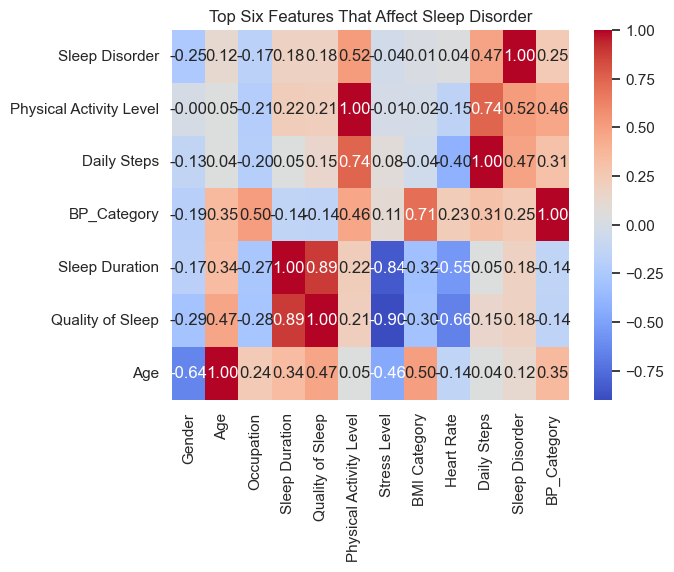

In [69]:
# Check the correlation for testing data frame
test_corr = df_test.corr()
test_corr_max_7 = test_corr.nlargest(7, "Sleep Disorder")
sns.heatmap(test_corr_max_7, annot=True, fmt=".2F", cmap="coolwarm")
plt.title("Top Six Features That Affect Sleep Disorder")
plt.show()

**Observations:**
Top six features that affect the sleeping disorder are:
* Physical Activity Level
* Daily Steps
* Sleep Duration
* BP_Category
* Quality of Sleep
* Age

## Data Spliting to Train and Test Sets

In [70]:
# Separate features and target variable
X = df_test.drop('Sleep Disorder', axis=1)
y = df_test['Sleep Disorder']
print('The dimensions of x is : ',X.shape)
print('The dimensions of y is : ',y.shape)

The dimensions of x is :  (374, 11)
The dimensions of y is :  (374,)


In [71]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Machine Learning:

**Logistic Regression**

In [72]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(max_iter=5000)
model_lr.fit(X_train, y_train)

# Model Evaluation
acc_lr = model_lr.score(X_test, y_test)
print(f"Accuracy: {acc_lr*100:.3f}%")

Accuracy: 86.290%


Confusion Matrix:
 [[22  4  1]
 [ 4 62  0]
 [ 2  6 23]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80        27
           1       0.86      0.94      0.90        66
           2       0.96      0.74      0.84        31

    accuracy                           0.86       124
   macro avg       0.87      0.83      0.84       124
weighted avg       0.87      0.86      0.86       124



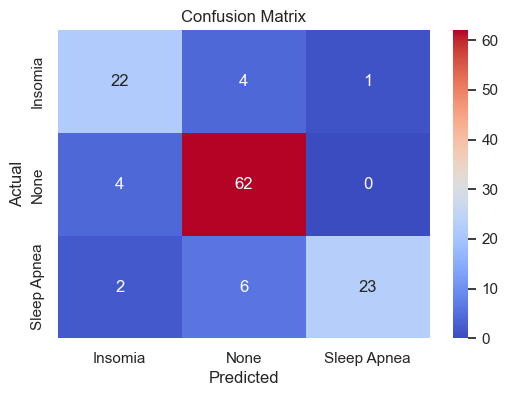

In [73]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix and Classification Report
y_pred_lr = model_lr.predict(X_test)
cm_lr = confusion_matrix(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)

print("Confusion Matrix:\n", cm_lr)
print("Classification Report:\n", report_lr)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='coolwarm', cbar=True,
            xticklabels=['Insomia', 'None', 'Sleep Apnea'],
            yticklabels=['Insomia', 'None', 'Sleep Apnea'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Random Forest Classifier**

In [74]:
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier()
model_rfc.fit(X_train, y_train)

# Model Evaluation
acc_rfc = model_rfc.score(X_test, y_test)
print(f"Accuracy: {acc_rfc*100:.3f}%")

Accuracy: 87.903%


Confusion Matrix:
 [[21  4  2]
 [ 1 65  0]
 [ 1  7 23]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.78      0.84        27
           1       0.86      0.98      0.92        66
           2       0.92      0.74      0.82        31

    accuracy                           0.88       124
   macro avg       0.90      0.83      0.86       124
weighted avg       0.88      0.88      0.88       124



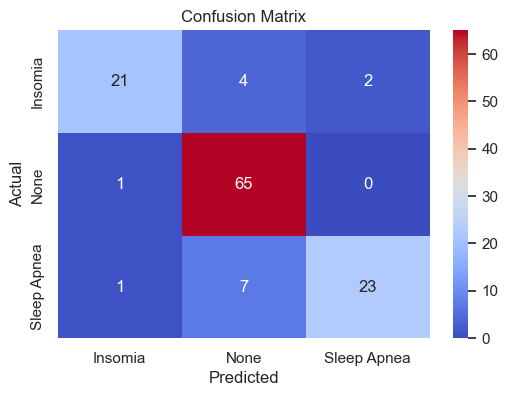

In [75]:
# Confusion Matrix and Classification Report
y_pred_rfc = model_rfc.predict(X_test)
cm_rfc = confusion_matrix(y_test, y_pred_rfc)
report_rfc = classification_report(y_test, y_pred_rfc)

print("Confusion Matrix:\n", cm_rfc)
print("Classification Report:\n", report_rfc)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rfc, annot=True, fmt='d', cmap='coolwarm', cbar=True, linecolor="white",
            xticklabels=['Insomia', 'None', 'Sleep Apnea'],
            yticklabels=['Insomia', 'None', 'Sleep Apnea'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**XGBoost Classifier**

In [76]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier()

model_xgb.fit(X_train, y_train)

# Model Evaluation
accuracy = model_xgb.score(X_test, y_test)
print(f"Accuracy: {accuracy*100:.3f}%")

Accuracy: 89.516%


Confusion Matrix:
 [[21  2  4]
 [ 1 65  0]
 [ 1  5 25]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.78      0.84        27
           1       0.90      0.98      0.94        66
           2       0.86      0.81      0.83        31

    accuracy                           0.90       124
   macro avg       0.89      0.86      0.87       124
weighted avg       0.89      0.90      0.89       124



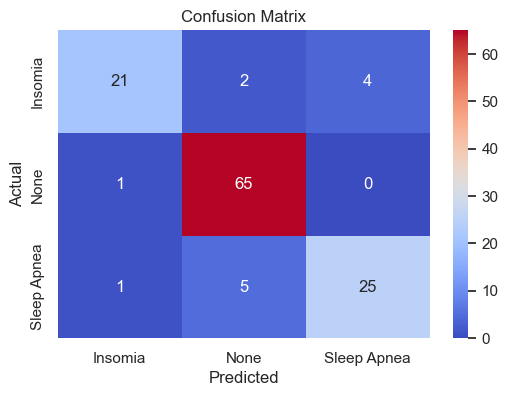

In [77]:
# Confusion Matrix and Classification Report
y_pred_xgb = model_xgb.predict(X_test)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)

print("Confusion Matrix:\n", cm_xgb)
print("Classification Report:\n", report_xgb)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='coolwarm', cbar=True, linecolor="white",
            xticklabels=['Insomia', 'None', 'Sleep Apnea'],
            yticklabels=['Insomia', 'None', 'Sleep Apnea'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Next Approach: Handling Imbalance Target Sleep Disorder
- It is clear that the proportion of people without sleeping disorder possessed larger volume compared to others.

**Implementation of SMOTE Method**

In [78]:
from imblearn.over_sampling import SMOTE

In [79]:
smote = SMOTE(sampling_strategy="auto")
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

Sleep Disorder
1    219
2    219
0    219
Name: count, dtype: int64

In [80]:
print('The dimensions of X is : ',X_sm.shape)
print('The dimensions of y is : ',y_sm.shape)

The dimensions of X is :  (657, 11)
The dimensions of y is :  (657,)


In [81]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.33, random_state=42)

**Logistic Regression with SMOTE Dataset**

In [82]:
model_lr = LogisticRegression(max_iter=5000)
model_lr.fit(X_train, y_train)

# Model Evaluation
acc_lr = model_lr.score(X_test, y_test)
print(f"Accuracy: {acc_lr*100:.3f}%")

Accuracy: 88.940%


Confusion Matrix:
 [[46  2  4]
 [ 6 77  1]
 [ 7  4 70]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.83        52
           1       0.93      0.92      0.92        84
           2       0.93      0.86      0.90        81

    accuracy                           0.89       217
   macro avg       0.88      0.89      0.88       217
weighted avg       0.89      0.89      0.89       217



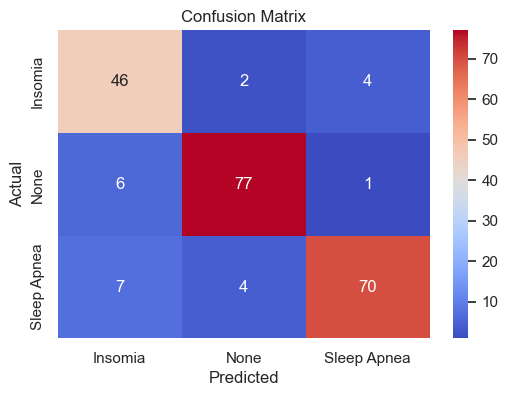

In [83]:
# Confusion Matrix and Classification Report
y_pred_lr = model_lr.predict(X_test)
cm_lr = confusion_matrix(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)

print("Confusion Matrix:\n", cm_lr)
print("Classification Report:\n", report_lr)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='coolwarm', cbar=True,
            xticklabels=['Insomia', 'None', 'Sleep Apnea'],
            yticklabels=['Insomia', 'None', 'Sleep Apnea'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Random Forest Classifier with SMOTE Dataset**

In [84]:
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier()
model_rfc.fit(X_train, y_train)

# Model Evaluation
acc_rfc = model_rfc.score(X_test, y_test)
print(f"Accuracy: {acc_rfc*100:.3f}%")

Accuracy: 94.931%


Confusion Matrix:
 [[48  1  3]
 [ 4 80  0]
 [ 0  3 78]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92        52
           1       0.95      0.95      0.95        84
           2       0.96      0.96      0.96        81

    accuracy                           0.95       217
   macro avg       0.95      0.95      0.95       217
weighted avg       0.95      0.95      0.95       217



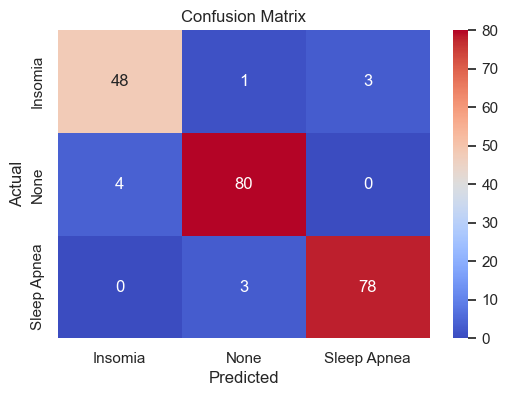

In [85]:
# Confusion Matrix and Classification Report
y_pred_rfc = model_rfc.predict(X_test)
cm_rfc = confusion_matrix(y_test, y_pred_rfc)
report_rfc = classification_report(y_test, y_pred_rfc)

print("Confusion Matrix:\n", cm_rfc)
print("Classification Report:\n", report_rfc)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rfc, annot=True, fmt='d', cmap='coolwarm', cbar=True, linecolor="white",
            xticklabels=['Insomia', 'None', 'Sleep Apnea'],
            yticklabels=['Insomia', 'None', 'Sleep Apnea'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**XGBoost Classifier with SMOTE Dataset**

In [86]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier()

model_xgb.fit(X_train, y_train)

# Model Evaluation
accuracy = model_xgb.score(X_test, y_test)
print(f"Accuracy: {accuracy*100:.3f}%")

Accuracy: 94.470%


Confusion Matrix:
 [[48  1  3]
 [ 4 80  0]
 [ 1  3 77]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.91        52
           1       0.95      0.95      0.95        84
           2       0.96      0.95      0.96        81

    accuracy                           0.94       217
   macro avg       0.94      0.94      0.94       217
weighted avg       0.94      0.94      0.94       217



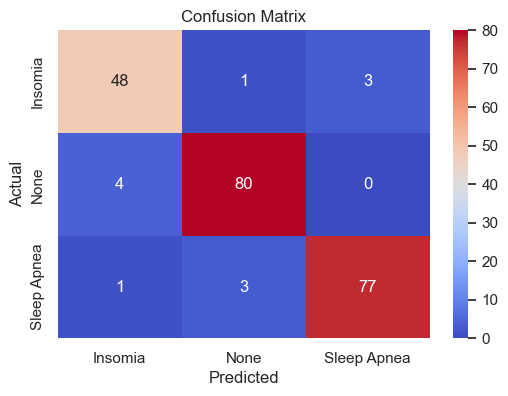

In [87]:
# Confusion Matrix and Classification Report
y_pred_xgb = model_xgb.predict(X_test)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)

print("Confusion Matrix:\n", cm_xgb)
print("Classification Report:\n", report_xgb)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='coolwarm', cbar=True, linecolor="white",
            xticklabels=['Insomia', 'None', 'Sleep Apnea'],
            yticklabels=['Insomia', 'None', 'Sleep Apnea'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

---
# Author Information

**Author:** CHUA JINGXUAN

**Note:** This Jupyter Notebook was created by CHUA JINGXUAN. If you find any issues, have questions, or want to provide feedback, please don't hesitate to reach out. Thank you for exploring this notebook!